In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("dna_samples.csv")
df

,SampleID,DNA_Sequence
0,Sample_01,ATGCGTAGCTAGCTAGCT
1,Sample_02,ATGGGCCCAAAATTTCCCGGG
2,Sample_03,ATGCTAGCTAGCTAGCX
3,Sample_04,ATGCGTACGTAGCTAGC
4,Sample_05,ATGZZZAAAATTTCCCGGG


In [6]:
tem=df.loc[1,'DNA_Sequence']
tem

'ATGGGCCCAAAATTTCCCGGG'

In [3]:
results = []

for i in range(len(df)):
    sample_id = df.loc[i, "SampleID"]
    dna = df.loc[i, "DNA_Sequence"].upper()

    # Check if DNA is valid
    valid = True

    # Check DNA validity
    for base in dna:
        if base not in "ATCG":
            print("Invalid DNA sequence found:",sample_id)
            print("This sequence has been removed.\n")
            valid = False
            break

    # Skip invalid sequences
    if not valid:
        continue
    

    # Count nucleotides
    A = dna.count("A")
    T = dna.count("T")
    C = dna.count("C")
    G = dna.count("G")

    # Length of DNA
    length = len(dna)

    # GC content
    gc_content = (C + G) / length * 100

    # Save result
    results.append([sample_id, length, A, T, C, G, gc_content])

# Create summary DataFrame
summary = pd.DataFrame(
    results,
    columns=["SampleID", "Length", "A", "T", "C", "G", "GC_Content"]
)

print(summary)

Invalid DNA sequence found: Sample_03
This sequence has been removed.

Invalid DNA sequence found: Sample_05
This sequence has been removed.

    SampleID  Length  A  T  C  G  GC_Content
0  Sample_01      18  4  5  4  5   50.000000
1  Sample_02      21  5  4  6  6   57.142857
2  Sample_04      17  4  4  4  5   52.941176


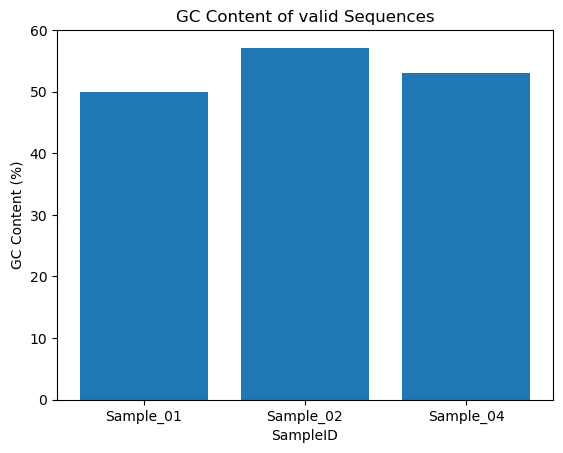

In [11]:
plt.bar(summary["SampleID"], summary["GC_Content"])
plt.title("GC Content of valid Sequences")
plt.xlabel("SampleID")
plt.ylabel("GC Content (%)")
plt.show()


In [ ]:

# Save summary
summary.to_csv("dna_summary.csv", index=False)